# Project: Wrangle and Analyze Data

## Project Details

Your tasks in this project are as follows:

- Data wrangling, which consists of:
    1. Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    2. Assessing data
    3. Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

## Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

- The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

import requests 
import tweepy 
import json 
import re 

### Load the 1st dataset

In [2]:
df_twitter = pd.read_csv("./twitter-archive-enhanced.csv")
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Load the 2nd dataset

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
# response.content
with open("image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
df_predictions = pd.read_csv("./image-predictions.tsv", sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Load the 3rd dataset

In [5]:
# exec(open("./twitter-api.py").read())

In [6]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
""";

My developer account application wat rejected by Twitter. The above code block is a copy & paste from `twitter-api.py` and was not actually executed.

In [7]:
count = 1
with open('./tweet-json.txt') as json_file:
    for line in json_file:
        post = json.loads(line)
        
        if count == 1: print(post)
        
        print()
        print("tweet_id:", post["id"])
        print(post["full_text"])

        count = count+1
        if count > 5: break

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
api = []
with open('./tweet-json.txt') as json_file:
    for line in json_file:
        post = json.loads(line)
        api.append({"tweet_id": post["id"],
                    "retweet_count": post["retweet_count"],
                    "favorite_count": post["favorite_count"],
                    "retweeted": post["retweeted"],
                    "favorited": post["favorited"]})        
df_api = pd.DataFrame(api, columns = ["tweet_id", "retweet_count", "favorite_count"])
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data

### Dataset \#1

In [9]:
df_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
2189,668967877119254528,6.689207e+17,21435658.0,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,10,10,None,None,None,None,None
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None


In [10]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_twitter.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

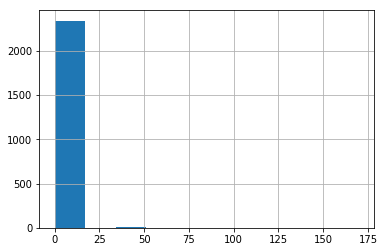

In [14]:
df_twitter.rating_denominator.hist();

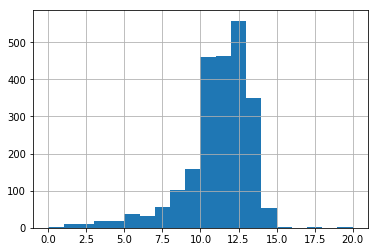

In [15]:
df_twitter.rating_numerator.hist(bins=[x for x in range(21)]);

### Dataset \#2

In [16]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True,Irish_terrier,0.026850,True,Lakeland_terrier,0.016826,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True


In [17]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


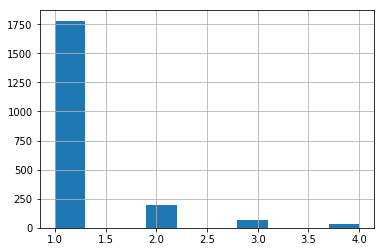

In [18]:
df_predictions.img_num.hist()

In [19]:
df_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

### Dataset \#3

In [20]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
135,866334964761202691,15546,54720
534,807059379405148160,8521,0
1497,692187005137076224,929,2768
832,768473857036525572,3958,15110
759,778383385161035776,1271,6515
788,773985732834758656,4492,11925
1682,681679526984871937,499,1923
636,793286476301799424,10723,27597
2351,666033412701032449,47,128
1344,704480331685040129,1197,3723


In [21]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


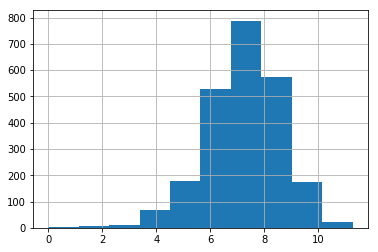

In [22]:
df_api.retweet_count.apply(lambda x: np.log(x+1)).hist();

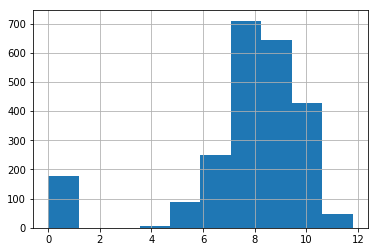

In [23]:
df_api.favorite_count.apply(lambda x: np.log(x+1)).hist();

## Cleaning data

### Key Points

Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### Data issue #1

time stamp format

In [24]:
df_twitter_clean = df_twitter.copy()
df_twitter_clean.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [25]:
pd.to_datetime(df_twitter_clean.timestamp).head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

Great new: Pandas' parsing works well; there is no need to clean the orginal string.

In [26]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Data issue #2 

the name issue

In [27]:
df_twitter_clean[df_twitter_clean.name.str.title() != df_twitter_clean.name].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
mad              2
getting          2
not              2
actually         2
CeCe             2
this             1
DonDon           1
such             1
incredibly       1
life             1
by               1
officially       1
space            1
light            1
DayZ             1
unacceptable     1
JD               1
old              1
my               1
his              1
infuriating      1
all              1
BeBe             1
Name: name, dtype: int64

These names do not look like real name. I am gonna replace them with NaN.

In [28]:
df_twitter_clean.loc[df_twitter_clean.name.str.title() != df_twitter_clean.name, 'name'] = np.nan

In [29]:
df_twitter_clean.name.value_counts()

None        745
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
Toby          7
Buddy         7
Bailey        7
Daisy         7
Dave          6
Oscar         6
Scout         6
Milo          6
Bella         6
Jack          6
Rusty         6
Leo           6
Koda          6
Stanley       6
Jax           6
Sammy         5
Sunny         5
Bentley       5
Finn          5
           ... 
Pavlov        1
Grady         1
Kendall       1
Gordon        1
Sandra        1
Terrenth      1
Henry         1
Jaspers       1
Katie         1
Pubert        1
Lilah         1
Jarod         1
Donny         1
Glenn         1
Karma         1
Sweets        1
Rascal        1
Lambeau       1
Sailer        1
Eazy          1
Emma          1
Ronnie        1
Franq         1
Travis        1
Maxwell       1
Laika         1
Amélie        1
Binky         1
Monty         1
Koko          1
Name: name, Length: 927,

#### Data issue #3



Variable `source` contains unnecessary information

In [30]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
df_twitter_clean['source'] = df_twitter_clean.source.apply(lambda x: re.findall(">(.*)</a>", x)[0])

In [32]:
df_twitter_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Data issue #4



Remove the retweeted

In [33]:
df_twitter_clean[~df_twitter_clean.retweeted_status_id.isna()].text.head()

19    RT @dog_rates: This is Canela. She attempted s...
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36    RT @dog_rates: This is Lilly. She just paralle...
68    RT @dog_rates: This is Emmy. She was adopted t...
73    RT @dog_rates: Meet Shadow. In an attempt to r...
Name: text, dtype: object

It seems original tweets have na value in `retweeted_status_id`. So we are gonna remove those don't.

In [34]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isna()]
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2065 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [35]:
df_twitter_clean[~df_twitter_clean.in_reply_to_status_id.isna()].text.head()

30     @NonWhiteHat @MayhewMayhem omg hello tanner yo...
55     @roushfenway These are good dogs but 17/10 is ...
64                       @RealKentMurphy 14/10 confirmed
113    @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
148    @Jack_Septic_Eye I'd need a few more pics to p...
Name: text, dtype: object

Similarly, we need remove those with non-null values in `retweeted_status_id`. These tweets look like follow-up discussions.

In [36]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.in_reply_to_status_id.isna()]
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1987 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

#### Tidiness issue #1 Merge data

Since our main table has been cleaned, we are ready to merge all three tables. 

In [37]:
df1 = df_twitter_clean.merge(df_predictions, on='tweet_id', how='left').merge(df_api, on='tweet_id', how='left')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 30 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1987 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
jpg_url                       19

#### Data issue #5

We find a new issue coming after matching. Some tweets do not have a pic url. So we are gonna remove them.

In [39]:
df1_clean = df1[~df1.jpg_url.isna()]

In [40]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 30 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1867 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       19

#### Data issue #6

Drop tweets with pictures that are not dogs. I impose a low standard: tweets with at least one valid breed label from prediction results are kept.

In [41]:
df1_clean = df1_clean[df1_clean.p1_dog | df1_clean.p2_dog | df1_clean.p3_dog]

#### Data issue #7

There are three predictions of dog's breed. For analysis, we only need one.

In [42]:
def return_label(x):
    if x.p1_dog:
        return x.p1
    elif x.p2_dog:
        return x.p2
    elif x.p3_dog:
        return x.p3
    else:
        return np.nan

In [43]:
df1_clean['breed'] = df1_clean.apply(return_label, axis=1)

In [44]:
df1_clean['breed'].value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
basset                             17
Italian_greyhound                  17
kuvasz      

Further, I need to clean these labels, replacing `-` and `_` with spaces.

In [45]:
df1_clean['breed'] = df1_clean['breed'].str.strip().str.replace('-',' ').str.replace('_',' ').str.lower()

#### Tidiness issue #2

Dog "stage" should be consolidated into one variable.

In [46]:
stage_list = ['doggo','floofer','pupper','puppo']
for x in stage_list:
    print(df1_clean[x].value_counts())
    print()

None     1603
doggo      63
Name: doggo, dtype: int64

None       1658
floofer       8
Name: floofer, dtype: int64

None      1493
pupper     173
Name: pupper, dtype: int64

None     1644
puppo      22
Name: puppo, dtype: int64



In [47]:
df1_clean['stage'] = df1_clean.apply(
    lambda x: ''.join([str(int(x[stage] == stage)) for stage in stage_list]), 
    axis=1)

In [48]:
df1_clean['stage'].value_counts()

0000    1409
0010     166
1000      54
0001      21
0100       7
1010       7
1001       1
1100       1
Name: stage, dtype: int64

In [49]:
for i in range(4):
    print("There are {:3} dogs in stage {}.".format(
        df1_clean['stage'].apply(lambda x: int(x[i])).sum(), stage_list[i]
    ))

There are  63 dogs in stage doggo.
There are   8 dogs in stage floofer.
There are 173 dogs in stage pupper.
There are  22 dogs in stage puppo.


These numbers match the results of value_counts(). So our transformation is successful.

Here, the i-th digit corresponds to the i-th elements of the list `['doggo','floofer','pupper','puppo']`. 

For example, 
- 0010 represents `pupper`.
- 1100 represents both `doggo` and `floofer`, which may not be a valid value. But we keep it here.

However, this variable may not be very useful. I create `stage2` which treats those with multiple stage labels as NaN.

In [50]:
df1_clean['stage2'] = df1_clean['stage'].map({"1000":"doggo",'0100':'floofer','0010':'pupper','0001':'puppo'})
df1_clean['stage2'].value_counts()

pupper     166
doggo       54
puppo       21
floofer      7
Name: stage2, dtype: int64

#### Data issue #8

Drop redundent variables and correct data type all together here.

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 33 columns):
tweet_id                      1666 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1666 non-null datetime64[ns]
source                        1666 non-null object
text                          1666 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1666 non-null object
rating_numerator              1666 non-null int64
rating_denominator            1666 non-null int64
name                          1581 non-null object
doggo                         1666 non-null object
floofer                       1666 non-null object
pupper                        1666 non-null object
puppo                         1666 non-null object
jpg_url                       16

In [52]:
df_final = df1_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                               'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])
df_final.drop(columns=stage_list, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 24 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1581 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null object
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-null object
retweet_count         1666 non-null int64
favorite_count        166

In [53]:
df_final.drop(columns=df_final.columns[10:19], inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 15 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1581 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null float64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
breed                 1666 non-null object
stage                 1666 non-null object
stage2                248 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 208.2+ KB


In [54]:
df_final['img_num']  = df_final.img_num.apply(int)
# df_final['tweet_id'] = df_final.tweet_id.apply(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 15 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1581 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
breed                 1666 non-null object
stage                 1666 non-null object
stage2                248 non-null object
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 208.2+ KB


In [55]:
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,breed,stage,stage2
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819,chihuahua,0000,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4328,25461,chihuahua,0000,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8964,42908,labrador retriever,0000,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9774,41048,basset,0000,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3261,20562,chesapeake bay retriever,0000,NaN


The data looks good now.

## Storing, Analyzing, and Visualizing Data

### Storing

In [56]:
df_final.to_csv('twitter_archive_master.csv', index = False)

In [57]:
!ls

act_report.html        twitter-api.py		     wrangle_act.ipynb
image-predictions.tsv  twitter-archive-enhanced.csv  wrangle_report.html
report_markdown        twitter_archive_master.csv
tweet-json.txt	       wrangle_act.html


### Analyzing, and Visualizing

First, we load the data.

In [58]:
data = pd.read_csv('twitter_archive_master.csv').drop(['expanded_urls','jpg_url','tweet_id','text'],axis=1)
data.head()

,timestamp,source,rating_numerator,rating_denominator,name,img_num,retweet_count,favorite_count,breed,stage,stage2
0,2017-08-01 00:17:27,Twitter for iPhone,13,10,Tilly,1,6514,33819,chihuahua,0,NaN
1,2017-07-31 00:18:03,Twitter for iPhone,12,10,Archie,1,4328,25461,chihuahua,0,NaN
2,2017-07-30 15:58:51,Twitter for iPhone,13,10,Darla,1,8964,42908,labrador retriever,0,NaN
3,2017-07-29 16:00:24,Twitter for iPhone,12,10,Franklin,2,9774,41048,basset,0,NaN
4,2017-07-29 00:08:17,Twitter for iPhone,13,10,None,1,3261,20562,chesapeake bay retriever,0,NaN


In [59]:
data.timestamp = pd.to_datetime(data.timestamp)

#### Explore #1. What dog breeds are the most popular?

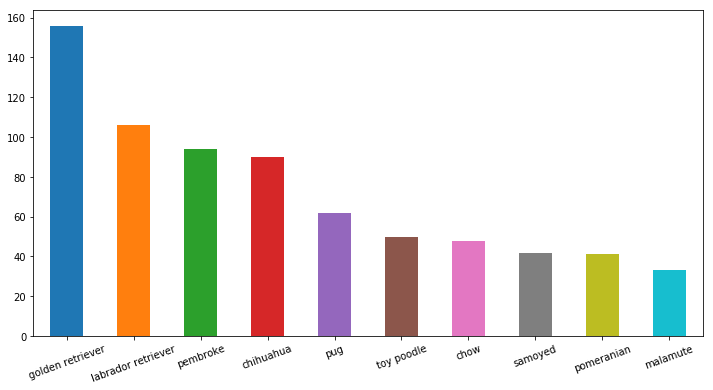

In [60]:
plt.figure(figsize=(12,6))
data.breed.value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=20);

It seems golden retriever is the most popluar dog breed, since it gets highest number of original tweets. However, this sounds more like prevalence. In what follows, I will use `rating`, `retweet count`, and `favorite count` to measure popularity.

First, I standardize all rating to a base of 10 and put a cap of 20.

In [61]:
data['standardized_rating'] = (data.rating_numerator/data.rating_denominator*10)\
                                    .apply(lambda x: min(x, 20))

In addition to ratings, we consider retweets and favorites as alternative indicators of popularity. Since these two numbers all highly skewed, a log transformation is preferred.

In [62]:
data['retweet_log']  = np.log(data.retweet_count +1)
data['favorite_log'] = np.log(data.favorite_count+1)

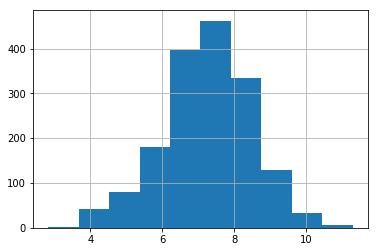

In [63]:
data['retweet_log'].hist();

In [64]:
df_by_breed = data.groupby('breed').mean()[['retweet_log','favorite_log','standardized_rating']]
df_by_breed['count'] = data.breed.value_counts()
df_by_breed.head()

,retweet_log,favorite_log,standardized_rating,count
breed,,,,
afghan hound,8.468199,9.616398,9.666667,3
airedale,6.840938,7.986674,9.833333,12
american staffordshire terrier,7.425679,8.707237,10.312500,16
appenzeller,7.154701,8.628749,11.000000,2
australian terrier,7.578673,8.810274,11.500000,2


I only consider breeds with at least 5 tweets.

In [65]:
rating_top10 = df_by_breed.query('count >= 5').standardized_rating.sort_values(ascending=False).head(10)
rating_top10 = rating_top10.reset_index()
rating_top10

,breed,standardized_rating
0,border terrier,12.142857
1,samoyed,11.690476
2,golden retriever,11.584499
3,great pyrenees,11.466667
4,pembroke,11.425532
5,chow,11.416667
6,eskimo dog,11.409091
7,norfolk terrier,11.333333
8,cocker spaniel,11.333333
9,doberman,11.333333


We use the violin plot to show the rating distribution within the breed.

In [ ]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="standardized_rating", kind="violin", order=rating_top10.breed,
              data=data[data.breed.isin(rating_top10.breed)]);
plt.xticks(rotation=20);

In [ ]:
retweet_top10 = df_by_breed.query('count >= 5').retweet_log.sort_values(ascending=False).head(10)
retweet_top10 = retweet_top10.reset_index()
retweet_top10

In [ ]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="retweet_log", kind="violin", order=retweet_top10.breed,
              data=data[data.breed.isin(retweet_top10.breed)]);
plt.xticks(rotation=20);

In [ ]:
favorite_top10 = df_by_breed.query('count >= 5').favorite_log.sort_values(ascending=False).head(10)
favorite_top10 = favorite_top10.reset_index()
favorite_top10

In [ ]:
plt.figure(figsize=(12,8))
sb.violinplot(x="breed", y="favorite_log", kind="violin", order=favorite_top10.breed,
              data=data[data.breed.isin(favorite_top10.breed)]);
plt.xticks(rotation=20);

In [ ]:
all_top10 = rating_top10.merge(retweet_top10, on='breed').merge(favorite_top10, on='breed')
all_top10

In [ ]:
all_top10 = all_top10.melt(value_vars=['standardized_rating','retweet_log','favorite_log'], 
                           id_vars='breed',
                           var_name='measure')
all_top10

In [ ]:
plt.figure(figsize=(12,8))
sb.barplot(x="breed", y="value", hue="measure", data=all_top10)
plt.title("Breeds in the top 10 lists of all three meaures ");

Hence, I believe these four breeds are the true most popular breeds.

### Explore 2. Time trend of engagement

In [ ]:
data['month'] = pd.PeriodIndex(data.timestamp, freq='M')

In [ ]:
df1 = data.groupby('month').sum()[['retweet_count', 'favorite_count']]
df1['tweet_count']  = data.month.value_counts()
df1['tweet_log']    = np.log(df1.tweet_count+1)
df1['retweet_log']  = np.log(df1.retweet_count +1)
df1['favorite_log'] = np.log(df1.favorite_count+1)

In [ ]:
df1.iloc[:,3:].plot(figsize=(12,8))
plt.title('Time trend of engagement');

### Explore #3.  Does the timing of posting a tweet matter?

If a participant wants to get a higher rate and more retweets, on which day of the week should she tweet? 

Here, we only explore the weekday effect. Similar questions could be raised regarding other aspects of timing, like what time within a day.

In [ ]:
sb.countplot(data.timestamp.dt.weekday);

In [ ]:
data['weekday'] = data.timestamp.dt.weekday

In [ ]:
var_list = ['retweet_count','favorite_count','retweet_log','favorite_log','standardized_rating']
df_by_weekday = data.groupby('weekday').mean()[var_list].reset_index()
df_by_weekday

In [ ]:
df_by_weekday = df_by_weekday.melt(value_vars=var_list, id_vars='weekday', var_name='measure')
df_by_weekday

In [ ]:
plt.figure(figsize=(12,8))
sb.barplot(x="weekday", y="value", hue="measure", data=df_by_weekday.query('value>100'));

It seems tweeting on Wednesday can get a higher number of retweet and favorite. However, this results could be driven by some extreme cases because we are using the arithmetic mean. Let's take a look at the average of log and ratings.

In [ ]:
plt.figure(figsize=(12,8))
sb.barplot(x="weekday", y="value", hue="measure", data=df_by_weekday.query('value<100'));

Now the advantage of Wednesday is gone. It seems there is no difference between different weekdays.

### Summary

In this section, we have explored three topics:
1. What dog breeds are the most popular
2. The Time trend of twitter engagement
3. Best timing of posting a tweet